Kernel:  1**2 * RBF(length_scale=0.1)


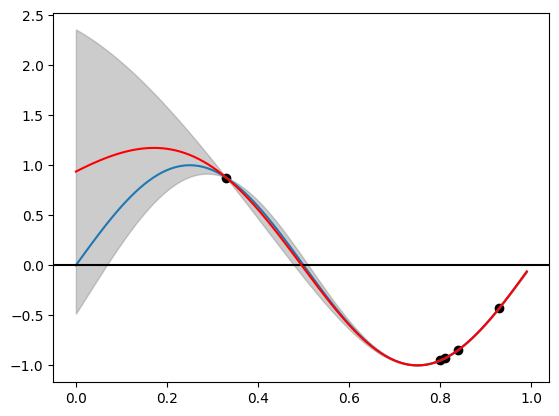

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

A=1.0
f=1
T=1.0
x=100
step=1/x
t = np.arange(0.0, T, step)
# print(t)

y=A*np.sin(2*np.pi*f*t)
# print(len(y))

plt.plot(t, y)
plt.axhline(y=0, color='black')


np.random.seed(1)
indices = np.random.choice(len(t), size=5, replace=False)
dataset_t = t[indices]
dataset_y = y[indices]

# plt.show()

X=dataset_t.reshape(-1,1)
# Y=dataset_y.reshape(-1,1)

kernel = 1.0 * RBF(length_scale=0.1)
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)


gp.fit(X, dataset_y)

T1=t.reshape(-1,1)
ypred,sigma=gp.predict(T1,return_std=True)
plt.plot(T1,ypred,color='red')
plt.scatter(X,dataset_y,color='black')
T1=T1.reshape(-1)
plt.fill_between(T1, ypred -2* sigma, ypred +2*sigma, color='gray', alpha=0.4)
print("Kernel: ", kernel)
plt.show()

